# Umfrage: Frauen, Trans-, Inter- und nicht-binäre Personen im Discgolf

<a id='intro'></a>
## Übersicht

Original-Datensatz, erhoben Sep-Nov 2022

416 valide Antworten <br>
327 Variablen 

Datensatz splittet sich in drei Befragungen:<br>
Alle Befragten: SD_ und IN_ <br>
Weiblich/Divers SpielerInnen: WD_<br>
Weiblich/Divers Nicht-SpielerInnen: ND_<br>
Männlich Spieler: M0_ (Abwandlung des Fragebogens WD_)
    
### Forschungsfragen
<ul>
<li>Mit welchen Problemen sehen sich Frauen und TIN Personen im Discgolf konfrontiert? </li>
<li>Wie wird Sexismus in der Community (ggf. unterschiedlich) wahrgenommen? </li>
<li>Was sind Bedürfnisse der Frauen und TIN Personen im Discgolf? </li>
<li>Was sind Gründe dafür, dass Frauen und TIN Personen nicht anfangen Discgolf zu spielen bzw. nicht dabeibleiben? </li>
<li>Gibt es konkrete Erfahrungen (sowohl positive als auch negative), die gehäuft auftreten  oder als Fallbeispiele aufschlussreich sind? </li>
</ul>

### Table of Contents

<ul>
<li><a href="#intro">Übersicht</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>

<li><a href="#alle">1. Soziodemografie (alle Befragten, SpielerInnen vs. Nicht-SpielerInnen)</a></li>
<li><a href="#nogolf">2. Nicht-SpielerInnen (ND_): Was hält sie ab?</a></li>
<li><a href="#golf">3. SpielerInnen: was unterscheided W/D von M im Discgolf? (WD_ vs M0_) </a></li>

</ul>




-----------------------------------

In [50]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

In [51]:
# Importing Dataset and define missing values
df = pd.read_excel('discgolf_data_reduziert.xlsx', na_values=[-9] )

In [52]:
# Löschen der Zeile 0 (zweireihiger Header)
df = df.drop(0)

In [53]:
# Zahl der Antworten (Zeilen) und Variablen (Spalten)
df.shape

(434, 247)

<a id='wrangling'></a>
## Data Wrangling

In [54]:
# Löschen der Antworten ohne Einverständnis
df = df[df.IN02 != 2]
# Zahl der Antworten und Variablen 
df.shape
# 18 gelöscht

(416, 247)

In [55]:
# Benennen der gemeinsamen Variablen
# Variablen benennen
df = df.rename(columns={"SD02_01": "SD02_01_Alter", "SD03": "SD03_Bundesland", "SD01": "SD01_Geschlecht", "SD04": "SD04_SpielerIn"})

### SpielerInnen  vs. Nicht-SpielerInnen definieren

In [56]:
# fehlende Werte der Variablen SD04_SpielerIn
df.SD04_SpielerIn.isna().sum()

276

In [57]:
# Recodieren der Variable SD04_SpielerIn (1 = w/d SpielerInnen, 2 = Nicht-Spielerinnen, missings = m Spieler)
# missings sollen auch den Wert 1 bekommen für SpielerInnen
df['SD04_SpielerIn'].fillna(1, inplace=True)
df.SD04_SpielerIn.isna().sum()

0

In [58]:
# Umkodieren der Werte 
umkodierung = {1: 'SpielerIn', 2:'Nicht-SpielerIn'}
df['SD04_SpielerIn'] = df['SD04_SpielerIn'].replace(umkodierung)

### Geschlechter benennen

In [59]:
umkodierung = {1: 'Divers', 2:'Weiblich', 3:'Männlich'}
df['SD01_Geschlecht'] = df['SD01_Geschlecht'].replace(umkodierung)

### Bundesländern benennen

In [60]:
# Umkodieren der Werte 
umkodierung = {1: 'Nicht in Deutschland', 2:'Baden-Württemberg', 3: 'Bayern', 4:'Berlin', 5:'Brandenburg', 6:'Bremen', 7:'Hamburg', 8:'Hessen', 9:'Mecklenburg-Vorpommern', 10:'Niedersachsen', 11:'Nordrhein-Westfalen', 12:'Rheinland-Pfalz', 13:'Saarland', 14:'Sachsen-Anhalt', 15:'Sachsen', 16:'Schleswig-Holstein', 17:'Thüringen'}
df['SD03_Bundesland'] = df['SD03_Bundesland'].replace(umkodierung)

### Aufsplitten des Datensatzes

#### alle = Soziodemografie/Alle Befragte: (SD_)

In [61]:
alle = df.loc[:,df.columns.str.startswith('SD')]
alle.head(3)

,SD02_01_Alter,SD03_Bundesland,SD01_Geschlecht,SD04_SpielerIn
1,40,NaN,Weiblich,SpielerIn
2,44,NaN,Weiblich,SpielerIn
3,36,NaN,Weiblich,SpielerIn


In [62]:
alle.shape

(416, 4)

#### nogolf = weiblich/diverse Nicht-DiscgolferInnen (ND_)

In [63]:
nogolf = df.loc[:,df.columns.str.startswith(('ND', 'SD'))]

# SpielerInnen aussortieren
nogolf = nogolf[nogolf.SD04_SpielerIn == 'Nicht-SpielerIn']

nogolf.shape
# 20 NichtSpielerInnen verbleiben

(20, 26)

#### golf = weibliche/diverse/männliche DiscgolferInnen (WD_  und M0_)

In [64]:
# Variablen (m und w/d) mergen und fehlende Werte überschreiben, zumindest dort wo die Antwortmöglichkeiten praktisch identisch sind.
# check fehlende Werte
golf.M002.isna().sum(), golf.WD01.isna().sum() # passt
# Seit wann spielst du Discgolf?
df['M002_WD01'] = df['M002'].fillna(df['WD01'])
df['M002_01_WD01_01'] = df['M002_01'].fillna(df['WD01_01'])
df['M002_02_WD01_02'] = df['M002_02'].fillna(df['WD01_02'])
df['M002_01a_WD01_01a'] = df['M002_01a'].fillna(df['WD01_01a'])
df['M002_02a_WD01_02a'] = df['M002_02a'].fillna(df['WD01_02a'])
# Bist oder warst du in einem Discgolfverein angemeldet?
df['M003_WD02'] = df['M003'].fillna(df['WD02'])
# Wie oft spielst du Turniere
df['M005_WD04'] = df['M005'].fillna(df['WD04'])
df['M005_01_WD04_01'] = df['M005_01'].fillna(df['WD04_01'])
df['M005_02_WD04_02'] = df['M005_02'].fillna(df['WD04_02'])
df['M005_03_WD04_03'] = df['M005_03'].fillna(df['WD04_03'])
df['M005_04_WD04_04'] = df['M005_04'].fillna(df['WD04_04'])
df['M005_05_WD04_05'] = df['M005_05'].fillna(df['WD04_05'])
df['M005_01a_WD04_01a'] = df['M005_01a'].fillna(df['WD04_01a'])
df['M005_02a_WD04_02a'] = df['M005_02a'].fillna(df['WD04_02a'])
df['M005_03a_WD04_03a'] = df['M005_03a'].fillna(df['WD04_03a'])
df['M005_04a_WD04_04a'] = df['M005_04a'].fillna(df['WD04_04a'])
# Engagierst du dich für den Sport, egal ob als Vereinsmitglied oder privat?
df['M001_WD06'] = df['M001'].fillna(df['WD06'])
df['M001_01_WD06_01'] = df['M001_01'].fillna(df['WD06_01'])
df['M001_02_WD06_02'] = df['M001_02'].fillna(df['WD06_02'])
df['M001_03_WD06_03'] = df['M001_03'].fillna(df['WD06_03'])
df['M001_04_WD06_04'] = df['M001_04'].fillna(df['WD06_04'])
df['M001_05_WD06_05'] = df['M001_05'].fillna(df['WD06_05'])
df['M001_06_WD06_06'] = df['M001_06'].fillna(df['WD06_06'])
df['M001_05a_WD06_05a'] = df['M001_05a'].fillna(df['WD06_05a'])
df['M001_06a_WD06_06a'] = df['M001_06a'].fillna(df['WD06_06a'])
# Wie bist du auf Discgolf aufmerksam geworden?
df['M007_WD07'] = df['M007'].fillna(df['WD07'])
df['M007_01_WD07_01'] = df['M007_01'].fillna(df['WD07_01'])
df['M007_02_WD07_02'] = df['M007_02'].fillna(df['WD07_02'])
df['M007_03_WD07_03'] = df['M007_03'].fillna(df['WD07_03'])
df['M007_04_WD07_04'] = df['M007_04'].fillna(df['WD07_04'])
df['M007_05_WD07_05'] = df['M007_05'].fillna(df['WD07_05'])
df['M007_06_WD07_06'] = df['M007_06'].fillna(df['WD07_06'])
df['M007_07_WD07_07'] = df['M007_07'].fillna(df['WD07_07'])
df['M007_08_WD07_08'] = df['M007_08'].fillna(df['WD07_08'])
df['M007_09_WD07_09'] = df['M007_09'].fillna(df['WD07_09'])
df['M007_09a_WD07_09a'] = df['M007_09a'].fillna(df['WD07_09a'])
# Was hat dir an dem Sport gefallen, sodass du dabei geblieben bist?
df['M008_WD08'] = df['M008'].fillna(df['WD08'])
df['M008_01_WD08_01'] = df['M008_01'].fillna(df['WD08_01'])
df['M008_02_WD08_02'] = df['M008_02'].fillna(df['WD08_02'])
df['M008_03_WD08_03'] = df['M008_03'].fillna(df['WD08_03'])
df['M008_04_WD08_04'] = df['M008_04'].fillna(df['WD08_04'])
df['M008_05_WD08_05'] = df['M008_05'].fillna(df['WD08_05'])
df['M008_06_WD08_06'] = df['M008_06'].fillna(df['WD08_06'])
df['M008_07_WD08_07'] = df['M008_07'].fillna(df['WD08_07'])
df['M008_08_WD08_08'] = df['M008_08'].fillna(df['WD08_08'])
df['M008_09_WD08_09'] = df['M008_09'].fillna(df['WD08_09'])
df['M008_10_WD08_10'] = df['M008_10'].fillna(df['WD08_10'])
df['M008_11_WD08_11'] = df['M008_11'].fillna(df['WD08_11'])
df['M008_11a_WD08_11a'] = df['M008_11a'].fillna(df['WD08_11a'])
# Wie wohl fühlst du dich insgesamt als Mitglied der Discgolfgemeinschaft?
df['M009_01_WD09_01'] = df['M009_01'].fillna(df['WD09_01'])
# Was schätzt du: wie hoch ist der Anteeil von als weiblich oder divers gemeldeten Personen im Discgolf?
df['M010_01_WD10_01'] = df['M010_01'].fillna(df['WD10_01'])
df['M010_01a_WD10_01a'] = df['M010_01a'].fillna(df['WD10_01a'])
df['M010_02a_WD10_02a'] = df['M010_02a'].fillna(df['WD10_02a'])
df['M010_02_WD10_02'] = df['M010_02'].fillna(df['WD10_02'])
# ------- SPRUNG -------
#Bitte kreuze an, was du schon einmal erlebt hast bzw. was auf dich zutrifft.
df['M027_WD25'] = df['M027'].fillna(df['WD25'])
df['M027_01_WD25_01'] = df['M027_01'].fillna(df['WD25_01'])
df['M027_02_WD25_02'] = df['M027_02'].fillna(df['WD25_02'])
df['M027_03_WD25_03'] = df['M027_03'].fillna(df['WD25_03'])
df['M027_04_WD25_04'] = df['M027_04'].fillna(df['WD25_04'])
df['M027_05_WD25_05'] = df['M027_05'].fillna(df['WD25_05'])
df['M027_06_WD25_06'] = df['M027_06'].fillna(df['WD25_06'])
df['M027_07_WD25_07'] = df['M027_07'].fillna(df['WD25_07'])
df['M027_08_WD25_08'] = df['M027_08'].fillna(df['WD25_08'])
df['M027_09_WD25_09'] = df['M027_09'].fillna(df['WD25_09'])
df['M027_10_WD25_10'] = df['M027_10'].fillna(df['WD25_10'])
df['M027_11_WD25_11'] = df['M027_11'].fillna(df['WD25_11'])
df['M027_12_WD25_12'] = df['M027_12'].fillna(df['WD25_12'])
df['M027_13_WD25_13'] = df['M027_13'].fillna(df['WD25_13'])
df['M027_14_WD25_14'] = df['M027_14'].fillna(df['WD25_14'])
df['M027_15_WD25_15'] = df['M027_15'].fillna(df['WD25_15'])
df['M027_05a_WD25_05a'] = df['M027_05a'].fillna(df['WD25_05a'])

In [65]:
golf = df.loc[:,df.columns.str.startswith(('WD', 'M0', 'SD'))]# NICHTSpielerInnen aussortieren
golf = golf[golf.SD04_SpielerIn != 'Nicht-SpielerIn']
golf.shape

(396, 290)

<a id='alle'></a>
## 1. Soziodemografie (alle)

In [66]:
# missing values check. Bundesland leider 54 fehlende Angaben
alle.isna().sum()	

SD02_01_Alter       0
SD03_Bundesland    54
SD01_Geschlecht     0
SD04_SpielerIn      0
dtype: int64

### SD01_Geschlecht

In [67]:
#Häufigkeiten
geschlechter = alle['SD01_Geschlecht'].value_counts()
geschlechter

Männlich    276
Weiblich    133
Divers        7
Name: SD01_Geschlecht, dtype: int64

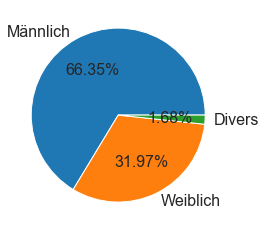

In [68]:
# Prozente
plt.pie(geschlechter, labels=geschlechter.index, autopct='%1.2f%%', textprops={'fontsize': 16});

### SD02_01_Alter

Text(0, 0.5, 'Häufigkeit')

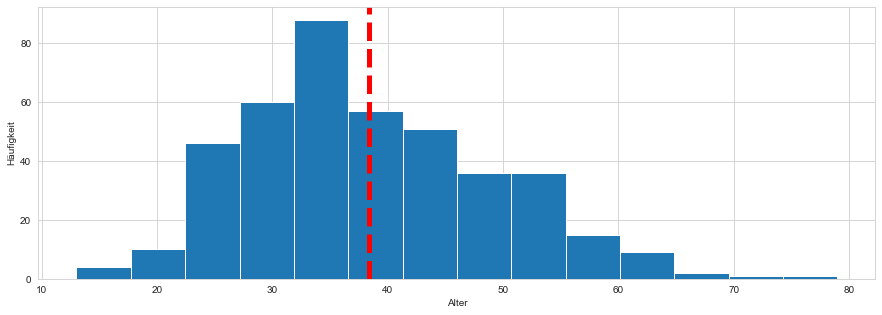

In [69]:
alle['SD02_01_Alter'].hist(figsize =(15,5), bins=14)	
# rote Linie für Durchschnittsalter
plt.axvline(x=df['SD02_01_Alter'].mean(), color='r', linestyle='--', linewidth=5)
# Set plot title and axis labels
plt.title('')
plt.xlabel('Alter')
plt.ylabel('Häufigkeit')

In [70]:
# Durchschnittalter aller Befragten
x=alle['SD02_01_Alter'].mean()
print(f'Durchschnittsalter aller Befragten: {x}')

Durchschnittsalter aller Befragten: 38.34134615384615


### SD03_Bundesland

In [71]:
# Verteilung auf die Bundesländer
# Count the occurrences of each value in the 'col' column
counts = alle['SD03_Bundesland'].value_counts()

# Sort the counts in descending order
sorted_counts = counts.sort_values(ascending=False)
sorted_counts

Nordrhein-Westfalen       81
Hessen                    41
Berlin                    39
Niedersachsen             33
Brandenburg               31
Baden-Württemberg         29
Bayern                    25
Bremen                    22
Hamburg                   20
Nicht in Deutschland      11
Mecklenburg-Vorpommern     6
Schleswig-Holstein         6
Sachsen                    5
Rheinland-Pfalz            4
Thüringen                  4
Sachsen-Anhalt             3
Saarland                   2
Name: SD03_Bundesland, dtype: int64

Text(0, 0.5, 'Häufigkeiten')

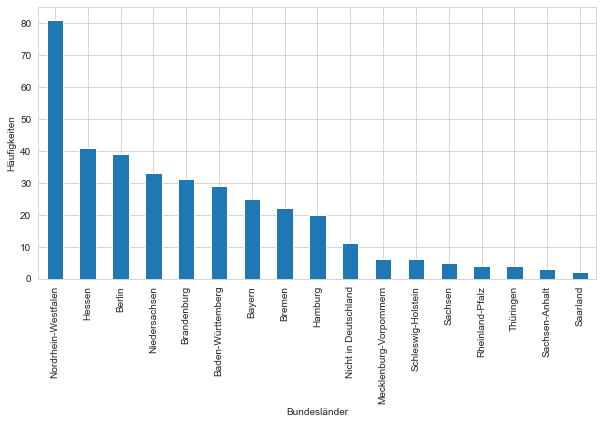

In [72]:
# Plot a bar chart of the sorted counts
sorted_counts.plot(kind='bar', figsize=(10, 5))

# Set plot title and axis labels
plt.title('')
plt.xlabel('Bundesländer')
plt.ylabel('Häufigkeiten')

### SD04_SpielerInnnen vs. Nicht-SpielerInnen

In [73]:
# 396 SpielerInnenen (m/w/d) / 20 NichtSpielerInnen (w/d)
alle['SD04_SpielerIn'].value_counts()

SpielerIn          396
Nicht-SpielerIn     20
Name: SD04_SpielerIn, dtype: int64

<a id='nogolf'></a>
## 2. Betrachtung der Nicht-Discgolf-SpielerInnen (20 Personen)

### Soziodemografie (leider zu wenige Fälle für interessante Aussagen)

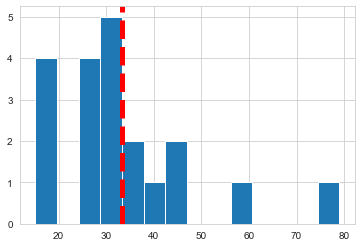

In [74]:
# Alter
x=nogolf['SD02_01_Alter'].mean()
nogolf.SD02_01_Alter.hist(bins=14)
plt.axvline(x=nogolf['SD02_01_Alter'].mean(), color='r', linestyle='--', linewidth=5)

In [129]:
# Durchschnittsalter
print(f'Durchschnittliches Alter: {x}')

Durchschnittliches Alter: 3.363178272980502


In [76]:
# Bundesland
nogolf.SD03_Bundesland.value_counts()

Bayern                    4
Brandenburg               4
Nordrhein-Westfalen       3
Baden-Württemberg         2
Sachsen                   1
Hessen                    1
Mecklenburg-Vorpommern    1
Bremen                    1
Name: SD03_Bundesland, dtype: int64

In [77]:
# Geschlecht: 17 weiblich, 3 divers
nogolf.SD01_Geschlecht.value_counts()

Weiblich    17
Divers       3
Name: SD01_Geschlecht, dtype: int64

### ND01 anderer Sport

In [78]:
# machst du einen anderen Sport?
nogolf.ND01.isna().sum()
# 0 missings
# 5 Personen haben NEIN genatwortet, die anderen folgendermaßen
nogolf.ND01_05.value_counts()

Ultimate                             6
Ultimate Frisbee                     3
Pilates, Yoga, bisschen Fitness      1
Pilates, Gymnasium, Fahrradfahren    1
Fahrradfahren, Wandern, Schwimmen    1
Laufen                               1
Ultimate Frisbee und Fußball         1
Pilates, Yoga, Schwimmen             1
Name: ND01_05, dtype: int64

### ND02 Woher kennen Nicht-SpielerInnen Discgolf?

In [79]:
# Umbenennen der Variablen
nogolf = nogolf.rename(columns={'ND02_01': 'ND02_01_Freunde/Familie', 'ND02_02':'ND02_02_PartnerIn', 'ND02_03':'ND02_03_Discgolf-Event', 'ND02_04':'ND02_04_Incentive','ND02_07':'ND02_07_Beobachtung','ND02_08':'ND02_08_Lokalpresse', 'ND02_09':'ND02_09_Webseite', 'ND02_10':'ND02_10_SozialeMedien', 'ND02_11':'ND02_11_Flyer', 'ND02_05':'ND02_05_Sonstiges', 'ND02_12':'ND02_12_GarNicht'})

In [80]:
# ND02 woher kennst du Discgolf? (2 = ausgewählt, 1 = nicht ausgewählt)
nogolf.ND02.isna().sum() # 0 missings
nogolf.ND02.value_counts() # Anzahl ausgewählter Optionen

1    13
2     4
3     2
5     1
Name: ND02, dtype: int64

In [81]:
# Define the value you want to count
value_to_count = 2

# Select columns that start with 'ND02_'
nd02_columns = nogolf.filter(regex='^ND02_')

# Leere Liste für neue Daten
counts = []

# Loop through each selected column and count the frequencies of the value
for col in nd02_columns:
    count = (nogolf[col] == value_to_count).sum()
    
    # store new data in Dictionary
    new_row = {'Variable': col, 'count': count}
    
    # add new data to eemoty list 'counts'
    counts.append(new_row)

# Liste in Dataframe umwandeln und nach Häufigkeiten sortieren
nogolf_ND02 = pd.DataFrame(counts).sort_values('count', ascending=False)
# Sortieren des DataFrames nach der Spalte "count"
nogolf_ND02

,Variable,count
0,ND02_01_Freunde/Familie,11
4,ND02_07_Beobachtung,7
9,ND02_05_Sonstiges,4
2,ND02_03_Discgolf-Event,3
1,ND02_02_PartnerIn,2
5,ND02_08_Lokalpresse,2
7,ND02_10_SozialeMedien,2
6,ND02_09_Webseite,1
3,ND02_04_Incentive,0
8,ND02_11_Flyer,0


In [82]:
nogolf.ND02_05a.value_counts() # Sonstige Angaben

Ultimateteam             1
Mitspieler*innen         1
über Ultimate Frisbee    1
Übers Ultimate           1
Name: ND02_05a, dtype: int64

### ND03 wüdest du gerne discgolf spielen?

In [83]:
# umkodieren der Werte
umkodieren = {1:'Ja', 2:'Vielleicht', 3:'Nein'}
# Ausgabe der Häufigkeiten
nogolf.ND03 = nogolf.ND03.replace(umkodieren)
nogolf.ND03.value_counts() 

Vielleicht    11
Nein           5
Ja             4
Name: ND03, dtype: int64

### ND06 Schätzung der weiblich/divers gemeldeten SpielerInnen (%)

In [84]:
# Umbenennen der Variablen
nogolf = nogolf.rename(columns={'ND06_01': 'weiblich-gemeldet',  'ND06_02': 'divers-gemeldet'})
# Zahlen mit Kommastellen und data type vereinheitlichen 
umkodierung = {'0,5':0.5, '0,2':0.2}
nogolf['divers-gemeldet'] = nogolf['divers-gemeldet'].replace(umkodierung)
nogolf['divers-gemeldet'] = nogolf['divers-gemeldet'].astype(float)

In [85]:
# Schätzung Anteil der weiblichen SpielerInnen (Mittelwert)
x  = nogolf['weiblich-gemeldet'].mean()
print(f'Nicht-SpielerInnen schätzen den Anteil weiblich gemeldeter Spielerinnen auf {x} Prozent')

16.45 Prozent


In [86]:
# Schätzung Anteil der diversen SpielerInnen (Mittelwert)
x = nogolf['divers-gemeldet'].mean()
print(f'Nicht-SpielerInnen schätzen den Anteil divers gemeldeter SpielerInnen auf {x} Prozent')

2.4157894736842107 Prozent


<a id='golf'></a>
## 3. Betrachtung der SpielerInnen (w/d/m) 

### Soziodemografie

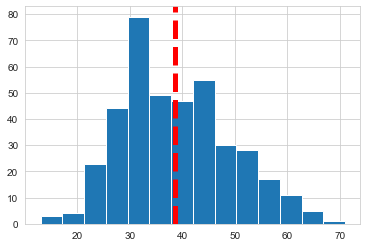

In [87]:
# Alter
x=golf['SD02_01_Alter'].mean()
golf.SD02_01_Alter.hist(bins=14)
plt.axvline(x=golf['SD02_01_Alter'].mean(), color='r', linestyle='--', linewidth=5)

In [88]:
# Altersdurchschnitt
x

38.59848484848485

In [89]:
# Bundesland
golf.SD03_Bundesland.value_counts()

Nordrhein-Westfalen       78
Hessen                    40
Berlin                    39
Niedersachsen             33
Baden-Württemberg         27
Brandenburg               27
Bayern                    21
Bremen                    21
Hamburg                   20
Nicht in Deutschland      11
Schleswig-Holstein         6
Mecklenburg-Vorpommern     5
Rheinland-Pfalz            4
Thüringen                  4
Sachsen                    4
Sachsen-Anhalt             3
Saarland                   2
Name: SD03_Bundesland, dtype: int64

In [90]:
# SpielerInnen nach Geschlecht
golf.groupby('SD01_Geschlecht').SD04_SpielerIn.value_counts()

SD01_Geschlecht  SD04_SpielerIn
Divers           SpielerIn           4
Männlich         SpielerIn         276
Weiblich         SpielerIn         116
Name: SD04_SpielerIn, dtype: int64

### M002_01_WD01_01 Seit wann spielst du Discgolf?

In [91]:
golf.shape

(396, 290)

In [92]:
# check missing values (7)
golf.M002_01a_WD01_01a.isna().sum(), 

# zeilen mit fehlenden Werten ausschließen
golf_aktiv = golf.dropna(subset=['M002_01a_WD01_01a'])
golf_aktiv.shape

(389, 290)

In [93]:
# check Antworten und data types: ANGEFANGEN im Jahr
golf_aktiv.M002_01a_WD01_01a.unique()

array(['2019', '2014', '2006', '2011', '2010', '2020', '2002', '2021',
       '2018', '2008', '2004', '1997', '2015', '2017', '2012', '2013',
       '1984', '2016', '2022', '1980', '2009', '2000', '1999', '2007',
       '1998', '1988', '2005', '1995', '1987'], dtype=object)

In [94]:
# check Antworten und data types: AUFGEHÖRT im Jahr
golf_aktiv.M002_02a_WD01_02a.unique()

array([nan, '2018', '2021', '1994', '2015', '2017', '2016', '2022'],
      dtype=object)

In [95]:
# object in integers umwandeln
# replace NaNs with -1 (sonst error message)
golf_aktiv['M002_01a_WD01_01a'] = golf_aktiv['M002_01a_WD01_01a'].fillna(-1)
golf_aktiv['M002_02a_WD01_02a'] = golf_aktiv['M002_02a_WD01_02a'].fillna(-1)

# convert column to integer type
golf_aktiv['M002_01a_WD01_01a'] = golf_aktiv['M002_01a_WD01_01a'].astype(int)
golf_aktiv['M002_02a_WD01_02a'] = golf_aktiv['M002_02a_WD01_02a'].astype(int)

# -1 in NaN zurück verwandeln
golf_aktiv.replace(-1, np.nan, inplace=True)
# NaNs bei "Aufgehört" in 2023 verwandeln
golf_aktiv['M002_02a_WD01_02a'] = golf_aktiv['M002_02a_WD01_02a'].fillna(2023)


golf_aktiv['M002_01a_WD01_01a'].unique(), golf_aktiv['M002_02a_WD01_02a'].unique()

<ipython-input-95-4c879df18999>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  golf_aktiv['M002_01a_WD01_01a'] = golf_aktiv['M002_01a_WD01_01a'].fillna(-1)
<ipython-input-95-4c879df18999>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  golf_aktiv['M002_02a_WD01_02a'] = golf_aktiv['M002_02a_WD01_02a'].fillna(-1)
<ipython-input-95-4c879df18999>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

(array([2019, 2014, 2006, 2011, 2010, 2020, 2002, 2021, 2018, 2008, 2004,
        1997, 2015, 2017, 2012, 2013, 1984, 2016, 2022, 1980, 2009, 2000,
        1999, 2007, 1998, 1988, 2005, 1995, 1987]),
 array([2023., 2018., 2021., 1994., 2015., 2017., 2016., 2022.]))

In [96]:
# neue Variable: aktive Discgolf Jahre 
golf_aktiv['aktiveJahre']=golf_aktiv['M002_02a_WD01_02a'] - golf_aktiv['M002_01a_WD01_01a']

<ipython-input-96-d52e0a3a1500>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  golf_aktiv['aktiveJahre']=golf_aktiv['M002_02a_WD01_02a'] - golf_aktiv['M002_01a_WD01_01a']


In [97]:
# Durchschnittliche aktive Discgolf Jahre
golf_aktiv['aktiveJahre'].mean()

6.5886889460154245

In [98]:
# Durchschnittliche aktive Discgolf Jahre nach Geschlecht
golf_aktiv.groupby('SD01_Geschlecht')['aktiveJahre'].mean()

SD01_Geschlecht
Divers      8.000000
Männlich    6.835165
Weiblich    5.955752
Name: aktiveJahre, dtype: float64

### M003_WD02 Bist du / warst du in Discgolf Verein angemeldet?

In [99]:
# check fehlende Werte
golf.M003_WD02.isna().sum()

0

In [100]:
umkodierung = {1:'Ja', 2:'Ja, aber bin kein Mitglied mehr', 3:'Nein, aber ich habe es vor', 4:'Nein'}
golf.M003_WD02 = golf.M003_WD02.replace(umkodierung)
golf.M003_WD02.value_counts()

Ja                                 299
Nein                                76
Nein, aber ich habe es vor          16
Ja, aber bin kein Mitglied mehr      5
Name: M003_WD02, dtype: int64

### M005_WD04 Wie oft spielst du Turniere?

In [101]:
# Umbenennen der Variablen
golf = golf.rename(columns={'M005_01a_WD04_01a': 'M005x_Vereins-Weeklies pro Jahr',
    'M005_02a_WD04_02a': 'M005x_Spaßturniere pro Jahr',
    'M005_03a_WD04_03a': 'M005x_Turniere in Deutschland',
    'M005_04a_WD04_04a': 'M005x_Turniere im Ausland',
    'M005_05_WD04_05': 'M005x_Keine'})


In [102]:
# Select columns that start with 'M005x_' OR 'SD01_'
M005_columns = golf.filter(regex='^(M005x_|SD01_)')
# Umkodieren von 'Keine' (2 = 0, 1= Nan)
M005_columns['M005x_Keine'] = M005_columns['M005x_Keine'].replace({1: pd.NA, 2: 0})

<ipython-input-102-5a6a180540ea>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  M005_columns['M005x_Keine'] = M005_columns['M005x_Keine'].replace({1: pd.NA, 2: 0})


#### Wer spielt gar keine Turniere?

In [103]:
M005_columns.groupby('SD01_Geschlecht')['M005x_Keine'].value_counts() #(2 ist zutreffend)

SD01_Geschlecht  M005x_Keine
Divers           0               2
Männlich         0              64
Weiblich         0              50
Name: M005x_Keine, dtype: int64

#### Wenn jemand Turniere, spielt, wieviel im Durchchnitt pro Jahr?

In [104]:
# Select columns that start with 'M005x_' OR 'SD01_'
M005_columns = golf.filter(regex='^(M005x_|SD01_)')

# Leere Liste für neue Daten
means = []

# Loop through each selected column and calculate the mean by gender
for col in M005_columns:
    if col != 'SD01_Geschlecht': # exclude the 'Geschlecht' column from the calculation
        # Groupby-Methode anwenden und nach der Spalte 'Geschlecht' gruppieren
        groupby_gender = golf.groupby('SD01_Geschlecht')
        
        # Mittelwert der Werte in der Spalte 'col' pro Geschlecht berechnen
        mean_by_gender = groupby_gender.apply(lambda x: (x[col]).mean()).round(2)
        
        # Neue Daten als Dictionary speichern und zur Liste 'means' hinzufügen
        for gender in mean_by_gender.index:
            new_row = {'Variable': col, 'SD01_Geschlecht': gender, 'mean': mean_by_gender[gender]}
            means.append(new_row)

# Liste in Dataframe umwandeln 
golf_M005 = pd.DataFrame(means)
golf_M005

# sortieren und summieren
golf_M005_pivot = golf_M005.pivot(index='Variable', columns='SD01_Geschlecht', values='mean')
golf_M005_pivot['Mean'] = golf_M005_pivot.mean(axis=1).round(2)
golf_M005_pivot = golf_M005_pivot.sort_values(by='Mean', ascending=False)
golf_M005_pivot

#drop last row
golf_M005_pivot = golf_M005_pivot.drop(golf_M005_pivot.index[-1])
golf_M005_pivot

SD01_Geschlecht,Divers,Männlich,Weiblich,Mean
Variable,,,,
M005x_Vereins-Weeklies pro Jahr,5.0,8.63,5.35,6.33
M005x_Turniere in Deutschland,5.5,5.95,4.79,5.41
M005x_Spaßturniere pro Jahr,6.5,3.73,3.12,4.45
M005x_Turniere im Ausland,NaN,1.88,2.50,2.19


### M001_WD06 Inwiefern engagierst du dich für den Sport?

In [105]:
# Umbenennen der Variablen
golf = golf.rename(columns={'M001_01_WD06_01': 'M001x_Organisation von Turnieren / Spielen',
'M001_02_WD06_02': 'M001x_Übernahme eines Amtes',
'M001_03_WD06_03': 'M001x_Engagement in Verein / Community',
'M001_04_WD06_04': 'M001x_Neulinge einführen',
'M001_05_WD06_05': 'M001x_Sonstiges',
'M001_06_WD06_06': 'M001x_Habe mich bisher nicht engagiert'})

#### Zutreffendes nach Geschlechtern

In [106]:
# Define the value you want to count (2 = ausgewählt)
value_to_count = 2

# Select columns that start with 'M027x_' OR 'SD01_'
M001_columns = golf.filter(regex='^(M001x_|SD01_)')

# Leere Liste für neue Daten
counts = []

# Loop through each selected column and count the frequencies of the value 2
for col in M001_columns:
    # Groupby-Methode anwenden und nach der Spalte 'Geschlecht' gruppieren
    groupby_gender = golf.groupby('SD01_Geschlecht')
    
    # Anzahl der Vorkommen von 'value_to_count' in der Spalte 'col' pro Geschlecht zählen
    count_by_gender = groupby_gender.apply(lambda x: (x[col] == value_to_count).sum())
    
    # Neue Daten als Dictionary speichern und zur Liste 'counts' hinzufügen
    for gender in count_by_gender.index:
        new_row = {'Variable': col, 'SD01_Geschlecht': gender, 'count': count_by_gender[gender]}
        counts.append(new_row)

# Liste in Dataframe umwandeln 
golf_M001 = pd.DataFrame(counts)

# sortieren und summieren
golf_M001_pivot = golf_M001.pivot(index='Variable', columns='SD01_Geschlecht', values='count')
golf_M001_pivot['Summe'] = golf_M001_pivot.sum(axis=1)
golf_M001_pivot = golf_M001_pivot.sort_values(by='Summe', ascending=False)
golf_M001_pivot

#drop last row
golf_M001_pivot = golf_M001_pivot.drop(golf_M001_pivot.index[-1])
golf_M001_pivot

SD01_Geschlecht,Divers,Männlich,Weiblich,Summe
Variable,,,,
M001x_Engagement in Verein / Community,0,146,39,185
M001x_Neulinge einführen,0,129,22,151
M001x_Organisation von Turnieren / Spielen,0,89,24,113
M001x_Habe mich bisher nicht engagiert,4,53,42,99
M001x_Übernahme eines Amtes,0,67,19,86
M001x_Sonstiges,0,39,18,57


#### Wieviel Prozent der Männer / Frauen / Diverse haben Variable X angekreut?

In [107]:
divisoren = [4, 276, 116, 396]
golf_M001_pct = golf_M001_pivot.div(divisoren) * 100
golf_M001_pct = golf_M001_pct.round(1)
golf_M001_pct

SD01_Geschlecht,Divers,Männlich,Weiblich,Summe
Variable,,,,
M001x_Engagement in Verein / Community,0.0,52.9,33.6,46.7
M001x_Neulinge einführen,0.0,46.7,19.0,38.1
M001x_Organisation von Turnieren / Spielen,0.0,32.2,20.7,28.5
M001x_Habe mich bisher nicht engagiert,100.0,19.2,36.2,25.0
M001x_Übernahme eines Amtes,0.0,24.3,16.4,21.7
M001x_Sonstiges,0.0,14.1,15.5,14.4


### M007_WD07 Wie bist du auf Discgolf aufmerksam geworden?

In [108]:
# Umbenennen der Variablen
golf = golf.rename(columns={'M007_01_WD07_01': 'Freunde/Familie',
    'M007x_02_WD07_02': 'M007x_PartnerIn',
    'M007_03_WD07_03': 'M007x_Discgolf-Event',
    'M007_04_WD07_04': 'M007x_Beobachtung',
    'M007_05_WD07_05': 'M007x_Lokalpresse',
    'M007_06_WD07_06': 'M007x_Website',
    'M007_07_WD07_07': 'M007x_Soziale Medien',
    'M007_08_WD07_08': 'M007x_Flyer',
    'M007_09_WD07_09': 'M007x_Sonstiges'})

#### Zutreffendes nach Geschlechtern

In [109]:
# Define the value you want to count (2 = ausgewählt)
value_to_count = 2

# Select columns that start with 'M027x_' OR 'SD01_'
M007_columns = golf.filter(regex='^(M007x_|SD01_)')

# Leere Liste für neue Daten
counts = []

# Loop through each selected column and count the frequencies of the value 2
for col in M007_columns:
    # Groupby-Methode anwenden und nach der Spalte 'Geschlecht' gruppieren
    groupby_gender = golf.groupby('SD01_Geschlecht')
    
    # Anzahl der Vorkommen von 'value_to_count' in der Spalte 'col' pro Geschlecht zählen
    count_by_gender = groupby_gender.apply(lambda x: (x[col] == value_to_count).sum())
    
    # Neue Daten als Dictionary speichern und zur Liste 'counts' hinzufügen
    for gender in count_by_gender.index:
        new_row = {'Variable': col, 'SD01_Geschlecht': gender, 'count': count_by_gender[gender]}
        counts.append(new_row)

# Liste in Dataframe umwandeln 
golf_M007 = pd.DataFrame(counts)

# sortieren und summieren
golf_M007_pivot = golf_M007.pivot(index='Variable', columns='SD01_Geschlecht', values='count')
golf_M007_pivot['Summe'] = golf_M007_pivot.sum(axis=1)
golf_M007_pivot = golf_M007_pivot.sort_values(by='Summe', ascending=False)
golf_M007_pivot

#drop last row
golf_M007_pivot = golf_M007_pivot.drop(golf_M007_pivot.index[-1])
golf_M007_pivot

SD01_Geschlecht,Divers,Männlich,Weiblich,Summe
Variable,,,,
M007x_Sonstiges,0,80,24,104
M007x_Beobachtung,0,40,10,50
M007x_Soziale Medien,0,38,5,43
M007x_Discgolf-Event,2,12,4,18
M007x_Website,0,6,4,10
M007x_Lokalpresse,0,9,0,9
M007x_Flyer,0,1,1,2


#### Wieviel Prozent der Männer / Frauen / Diverse haben Variable X angekreut?

In [110]:
divisoren = [4, 276, 116, 396]
golf_M007_pct = golf_M007_pivot.div(divisoren) * 100
golf_M007_pct = golf_M007_pct.round(1)
golf_M007_pct

SD01_Geschlecht,Divers,Männlich,Weiblich,Summe
Variable,,,,
M007x_Sonstiges,0.0,29.0,20.7,26.3
M007x_Beobachtung,0.0,14.5,8.6,12.6
M007x_Soziale Medien,0.0,13.8,4.3,10.9
M007x_Discgolf-Event,50.0,4.3,3.4,4.5
M007x_Website,0.0,2.2,3.4,2.5
M007x_Lokalpresse,0.0,3.3,0.0,2.3
M007x_Flyer,0.0,0.4,0.9,0.5


#### Sonstige Angaben

In [111]:
# alle Ergebnisse anzeigen
pd.set_option("display.max_rows", None)
golf['M007_09a_WD07_09a'].value_counts()

Ultimate                                                                                                                                                                             4
Playstation                                                                                                                                                                          2
Ultimate Frisbee                                                                                                                                                                     2
langjähriger Freestyler - Discgolf als alternativer Frisbee-Sport ausprobiert                                                                                                        1
Selbermachen                                                                                                                                                                         1
andere Ultimatespieler*innen                                                         

### M008_WD08 Warum bist du dabei geblieben?

In [112]:
# Umbenennen der Variablen
golf = golf.rename(columns={'M008_01_WD08_01':'M008x_Bewegung an der frischen Luft', 
                            'M008_02_WD08_02':'M008x_Faszination für den Flug der Scheiben',
                            'M008_03_WD08_03':'M008x_schnelle Lernkurve hat Ehrgeiz geweckt',
                            'M008_04_WD08_04':'M008x_nette Menschen kennen gelernt',
                            'M008_05_WD08_05':'M008x_gemeinsames Hobby mit PartnerIn',
                            'M008_06_WD08_06':'M008x_gemeinsames Hobby mit Familie/Freunde',
                            'M008_07_WD08_07':'M008x_zeitliche Flexibilität',
                            'M008_08_WD08_08':'M008x_geringe Kosten',
                            'M008_09_WD08_09':'M008x_Lust auf neue Herausforderung',
                            'M008_10_WD08_10':'M008x_vergleichsweise geringe körperliche Belastung',
                            'M008_11_WD08_11':'M008x_Sonstiges'})

#### Zutreffendes nach Geschlechtern

In [113]:
# Define the value you want to count (2 = ausgewählt)
value_to_count = 2

# Select columns that start with 'M027x_' OR 'SD01_'
M008_columns = golf.filter(regex='^(M008x_|SD01_)')

# Leere Liste für neue Daten
counts = []

# Loop through each selected column and count the frequencies of the value 2
for col in M008_columns:
    # Groupby-Methode anwenden und nach der Spalte 'Geschlecht' gruppieren
    groupby_gender = golf.groupby('SD01_Geschlecht')
    
    # Anzahl der Vorkommen von 'value_to_count' in der Spalte 'col' pro Geschlecht zählen
    count_by_gender = groupby_gender.apply(lambda x: (x[col] == value_to_count).sum())
    
    # Neue Daten als Dictionary speichern und zur Liste 'counts' hinzufügen
    for gender in count_by_gender.index:
        new_row = {'Variable': col, 'SD01_Geschlecht': gender, 'count': count_by_gender[gender]}
        counts.append(new_row)

# Liste in Dataframe umwandeln 
golf_M008 = pd.DataFrame(counts)

# sortieren und summieren
golf_M008_pivot = golf_M008.pivot(index='Variable', columns='SD01_Geschlecht', values='count')
golf_M008_pivot['Summe'] = golf_M008_pivot.sum(axis=1)
golf_M008_pivot = golf_M008_pivot.sort_values(by='Summe', ascending=False)
golf_M008_pivot

#drop last row
golf_M008_pivot = golf_M008_pivot.drop(golf_M008_pivot.index[-1])
golf_M008_pivot

SD01_Geschlecht,Divers,Männlich,Weiblich,Summe
Variable,,,,
M008x_Bewegung an der frischen Luft,1,233,100,334
M008x_Faszination für den Flug der Scheiben,1,225,55,281
M008x_zeitliche Flexibilität,1,174,67,242
M008x_nette Menschen kennen gelernt,0,170,66,236
M008x_geringe Kosten,1,125,57,183
M008x_schnelle Lernkurve hat Ehrgeiz geweckt,1,131,43,175
M008x_Lust auf neue Herausforderung,0,131,42,173
M008x_gemeinsames Hobby mit Familie/Freunde,1,125,47,173
M008x_gemeinsames Hobby mit PartnerIn,0,48,73,121


#### Wieviel Prozent der Männer / Frauen / Diverse haben Variable X angekreut?

In [114]:
divisoren = [4, 276, 116, 396]
golf_M008_pct = golf_M008_pivot.div(divisoren) * 100
golf_M008_pct = golf_M008_pct.round(1)
golf_M008_pct

SD01_Geschlecht,Divers,Männlich,Weiblich,Summe
Variable,,,,
M008x_Bewegung an der frischen Luft,25.0,84.4,86.2,84.3
M008x_Faszination für den Flug der Scheiben,25.0,81.5,47.4,71.0
M008x_zeitliche Flexibilität,25.0,63.0,57.8,61.1
M008x_nette Menschen kennen gelernt,0.0,61.6,56.9,59.6
M008x_geringe Kosten,25.0,45.3,49.1,46.2
M008x_schnelle Lernkurve hat Ehrgeiz geweckt,25.0,47.5,37.1,44.2
M008x_Lust auf neue Herausforderung,0.0,47.5,36.2,43.7
M008x_gemeinsames Hobby mit Familie/Freunde,25.0,45.3,40.5,43.7
M008x_gemeinsames Hobby mit PartnerIn,0.0,17.4,62.9,30.6


### M009_WD09 Wie wohl fühlst du dich in der Discgolfgemeinschaft? (1-101)

In [115]:
# check fehlende Werte
golf.M009_01_WD09_01.isna().sum()

0

In [116]:
# Durchschnittliches Wohlbefinden 1 - 101
golf.M009_01_WD09_01.mean()

78.01515151515152

In [117]:
# Durchschnittliches Wohlbefinden nach Geschlechtern 1 - 101
golf.groupby('SD01_Geschlecht')['M009_01_WD09_01'].mean()

SD01_Geschlecht
Divers      35.500000
Männlich    81.126812
Weiblich    72.077586
Name: M009_01_WD09_01, dtype: float64

### M010_WD10 Schätzung der weiblich/divers gemeldeten SpielerInnen (%)

In [118]:
# Umbenennen der Variablen
golf = golf.rename(columns={'M010_01_WD10_01': 'weiblich-gemeldet',  'M010_02_WD10_02': 'divers-gemeldet'})
# check data type
golf['weiblich-gemeldet'].dtype, golf['divers-gemeldet'].dtype
# Objects in 

(dtype('float64'), dtype('O'))

In [119]:
golf['divers-gemeldet'].unique() #ein paar sehr hohe Schätzungen dabei...

array(['0,5', '0', '1', '90', '0,1', '10', '0,2', nan, '3', '5', '2',
       '0,05', ',1', '>1', '20', '<1', '85', '0,3', '0.5', '0,001', '97',
       '0,02', '4', '0.2', '0.1', '80', '.5', '0,5 - 1', '0,01', '7',
       '92', '12'], dtype=object)

In [120]:
# Zahlen mit Kommastellen und data type vereinheitlichen 
umkodierung = {'0,5':0.5, '0,2':0.2, '0,1':0.1, '0,01':0.01,'0,05':0.05, ',1': 0.1, '>1': 1, '<1':1, '0,3':0.3, '0,001':0.001, '0,02':0.02, '.5':0.5, '0,5 - 1': 0.75}
golf['divers-gemeldet'] = golf['divers-gemeldet'].replace(umkodierung)
golf['divers-gemeldet'] = golf['divers-gemeldet'].astype(float)

In [121]:
# Schätzung Anteil der weiblichen SpielerInnen (Mittelwert)
x  = golf['weiblich-gemeldet'].mean()
print(f'{x} Prozent')

13.0 Prozent


In [122]:
golf.groupby('SD01_Geschlecht')['weiblich-gemeldet'].mean() #Frauen überschätzen ihren eigenen Anteil

SD01_Geschlecht
Divers      14.750000
Männlich    11.912214
Weiblich    15.504505
Name: weiblich-gemeldet, dtype: float64

In [123]:
# Schätzung Anteil der diversen SpielerInnen (Mittelwert)
x  = golf['divers-gemeldet'].mean()
print(f'{x} Prozent')

3.363178272980502 Prozent


In [124]:
golf.groupby('SD01_Geschlecht')['divers-gemeldet'].mean() #Männer überschätzen den Anteil divers gemeldeter

SD01_Geschlecht
Divers      1.125000
Männlich    3.974528
Weiblich    1.954369
Name: divers-gemeldet, dtype: float64

### SZENARIEN

### M027_WD25 Was hast du schonmal erlebt / trifft  auf dich zu? (multiple choice)

In [125]:
# Umbenennen der Variablen
golf = golf.rename(columns={'M027_05_WD25_05':'M027x_Sonstiges' ,'M027_06_WD25_06':'M027x_Habe nichts davon beobachtet / erlebt','M027_01_WD25_01': 'M027x_Verletzung der Eetikette durch Männer', 'M027_02_WD25_02':'M027x_Verletzung der Etikette durch Frauen/TIN', 'M027_03_WD25_03':'M027x_Keine Toilette vorhanden', 'M027_04_WD25_04':'M027x_Kein Verständnis bei Wartzeiten wegen Toilettenbesuch','M027_07_WD25_07':'M027x_Fühle mich als m/w/d Person nicht inkludiert','M027_08_WD25_08':'M027x_Macker-Verhalten oder -Sprüche','M027_09_WD25_09':'M027x_Eingeschüchtert durch sportliche Überlegenheit anderer', 'M027_10_WD25_10':'M027x_Sexistische Inhalte in SM / Chats', 'M027_11_WD25_11':'M027x_sexuelle Belästigung (verbal) beobachtet', 'M027_12_WD25_12':'M027x_sexuelle Belästigung (verbal) erlebt', 'M027_13_WD25_13':'M027x_sexuelle Belästigung (körperlich) beobachtet', 'M027_14_WD25_14':'M027x_sexuelle Belästigung (körperlich) erlebt', ' M027_15_WD25_15':'M027x_männliche(r) Spieler genervt dass ich ihm zugeteilt wurde'})

In [126]:
# Define the value you want to count (2 = ausgewählt)
value_to_count = 2

# Select columns that start with 'M027x_' OR 'SD01_'
M027_columns = golf.filter(regex='^(M027x_|SD01_)')

# Leere Liste für neue Daten
counts = []

# Loop through each selected column and count the frequencies of the value
for col in M027_columns:
    count = (golf[col] == value_to_count).sum()

    # store new data in Dictionary
    new_row = {'Variable': col, 'count': count}
    
    # add new data to empty list 'counts'
    counts.append(new_row)

# Liste in Dataframe umwandeln und nach Häufigkeiten sortieren
golf_M027 = pd.DataFrame(counts).sort_values('count', ascending=False)
# Sortieren des DataFrames nach der Spalte "count"
golf_M027

,Variable,count
3,M027x_Keine Toilette vorhanden,269
1,M027x_Verletzung der Eetikette durch Männer,235
8,M027x_Macker-Verhalten oder -Sprüche,165
2,M027x_Verletzung der Etikette durch Frauen/TIN,133
9,M027x_Eingeschüchtert durch sportliche Überleg...,123
10,M027x_Sexistische Inhalte in SM / Chats,62
6,M027x_Habe nichts davon beobachtet / erlebt,54
11,M027x_sexuelle Belästigung (verbal) beobachtet,53
5,M027x_Sonstiges,36
4,M027x_Kein Verständnis bei Wartzeiten wegen To...,28


#### Zutreffendes nach nach Geschlechtern 

In [127]:
# Define the value you want to count (2 = ausgewählt)
value_to_count = 2

# Select columns that start with 'M027x_' OR 'SD01_'
M027_columns = golf.filter(regex='^(M027x_|SD01_)')

# Leere Liste für neue Daten
counts = []

# Loop through each selected column and count the frequencies of the value
for col in M027_columns:
    # Groupby-Methode anwenden und nach der Spalte 'Geschlecht' gruppieren
    groupby_gender = golf.groupby('SD01_Geschlecht')
    
    # Anzahl der Vorkommen von 'value_to_count' in der Spalte 'col' pro Geschlecht zählen
    count_by_gender = groupby_gender.apply(lambda x: (x[col] == value_to_count).sum())
    
    # Neue Daten als Dictionary speichern und zur Liste 'counts' hinzufügen
    for gender in count_by_gender.index:
        new_row = {'Variable': col, 'SD01_Geschlecht': gender, 'count': count_by_gender[gender]}
        counts.append(new_row)

# Liste in Dataframe umwandeln 
golf_M027 = pd.DataFrame(counts)

# sortieren und summieren
golf_M027_pivot = golf_M027.pivot(index='Variable', columns='SD01_Geschlecht', values='count')
golf_M027_pivot['Summe'] = golf_M027_pivot.sum(axis=1)
golf_M027_pivot = golf_M027_pivot.sort_values(by='Summe', ascending=False)
golf_M027_pivot

#drop last row
golf_M027_pivot = golf_M027_pivot.drop(golf_M027_pivot.index[-1])
golf_M027_pivot

SD01_Geschlecht,Divers,Männlich,Weiblich,Summe
Variable,,,,
M027x_Keine Toilette vorhanden,3,180,86,269
M027x_Verletzung der Eetikette durch Männer,2,183,50,235
M027x_Macker-Verhalten oder -Sprüche,2,113,50,165
M027x_Verletzung der Etikette durch Frauen/TIN,1,100,32,133
M027x_Eingeschüchtert durch sportliche Überlegenheit anderer,1,64,58,123
M027x_Sexistische Inhalte in SM / Chats,1,47,14,62
M027x_Habe nichts davon beobachtet / erlebt,1,39,14,54
M027x_sexuelle Belästigung (verbal) beobachtet,0,37,16,53
M027x_Sonstiges,2,19,15,36


#### Wieviel Prozent der Männer / Frauen / Diverse haben Variable X angekreut?

In [128]:
divisoren = [4, 276, 116, 396]
golf_M027_pct = golf_M027_pivot.div(divisoren) * 100
golf_M027_pct = golf_M027_pct.round(1)
golf_M027_pct

SD01_Geschlecht,Divers,Männlich,Weiblich,Summe
Variable,,,,
M027x_Keine Toilette vorhanden,75.0,65.2,74.1,67.9
M027x_Verletzung der Eetikette durch Männer,50.0,66.3,43.1,59.3
M027x_Macker-Verhalten oder -Sprüche,50.0,40.9,43.1,41.7
M027x_Verletzung der Etikette durch Frauen/TIN,25.0,36.2,27.6,33.6
M027x_Eingeschüchtert durch sportliche Überlegenheit anderer,25.0,23.2,50.0,31.1
M027x_Sexistische Inhalte in SM / Chats,25.0,17.0,12.1,15.7
M027x_Habe nichts davon beobachtet / erlebt,25.0,14.1,12.1,13.6
M027x_sexuelle Belästigung (verbal) beobachtet,0.0,13.4,13.8,13.4
M027x_Sonstiges,50.0,6.9,12.9,9.1
